In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
house_sales = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv', sep=',')

In [ ]:
display(house_sales)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Data Manipulation**

In [ ]:
house_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_sales.shape


(21613, 21)

In [ ]:
house_sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Dropping few columns

In [ ]:
house_sales.drop(['id', 'date'], axis=1, inplace=True)

In [ ]:
house_sales.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Correlation**

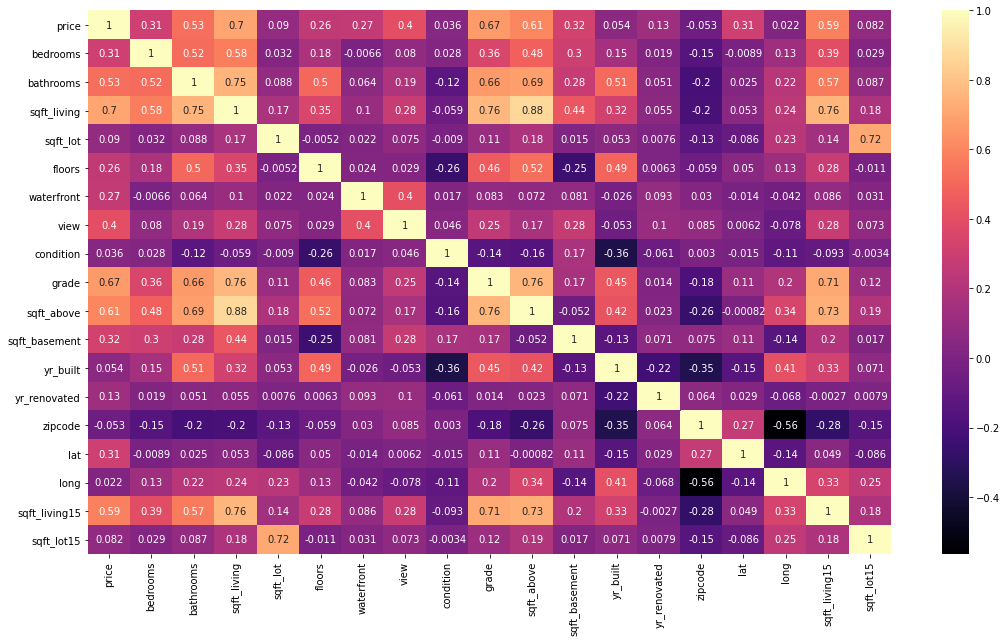

In [ ]:
#Look for value closer to zero
plt.figure(figsize=(18,10))
sns.heatmap(house_sales.corr(), annot=True, cmap='magma')

In [ ]:
house_df = house_sales.drop(['condition', 'zipcode', 'long', 'sqft_lot15', 'waterfront', 'sqft_basement', 'yr_renovated'], axis=1)
display(house_df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,7,1180,1955,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,0,7,2170,1951,47.7210,1690
2,180000.0,2,1.00,770,10000,1.0,0,6,770,1933,47.7379,2720
3,604000.0,4,3.00,1960,5000,1.0,0,7,1050,1965,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,0,8,1680,1987,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,8,1530,2009,47.6993,1530
21609,400000.0,4,2.50,2310,5813,2.0,0,8,2310,2014,47.5107,1830
21610,402101.0,2,0.75,1020,1350,2.0,0,7,1020,2009,47.5944,1020
21611,400000.0,3,2.50,1600,2388,2.0,0,8,1600,2004,47.5345,1410


In [ ]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'grade', 'sqft_above', 'yr_built', 'lat', 'sqft_living15'],
      dtype='object')

**Data Preprocessing**

In [ ]:
x = house_df.drop(['price'], axis=1)

In [ ]:
y = house_df['price']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))


In [ ]:
scaler.fit(x)
x_scaler = scaler.transform(x)

**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.1, random_state = 9)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(normalize = True)

In [ ]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
lr_model.score(x_test, y_test)

0.6830641767727961

**Metrics of Regression**

In [ ]:
yhat = lr_model.predict(x_test)
display(yhat)

array([113035.90125197, 435283.59732217, 405600.17817279, ...,
       490593.43499865, 207039.6075916 , 383022.68823121])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_squared_error(y_test, yhat)

43931201327.49788

In [ ]:
mean_absolute_error(y_test, yhat)

129460.18972226795

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_r = DecisionTreeRegressor(random_state=0, max_depth=9, criterion='mse')

In [ ]:
tree_r.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
tree_r.score(x_test, y_test)

0.7697692174175399

In [ ]:
tree_r.score(x_train, y_train)

0.8622551514483449

**New Sample**

In [ ]:
x_new = [[3,	1.00,	1180,	5650,	1.0,	0,	7,	1180,	1955,	47.5112,	1340]]

In [ ]:
x_newScaler = scaler.transform(x_new)

**Prediction from LR Model**

In [ ]:
lr_model.predict(x_newScaler)

array([275205.1605811])

In [ ]:
#Prediction from Decision Tree
tree_r.predict(x_newScaler)

array([262028.52373887])